# UM4MA379, Statistique Computationnelle, 2025-2026

Sorbonne Université, Master 1

Cours :  A. Guyader<br>
TP : M. Sangnier

## TP 3 : Chaînes de Markov, algorithme de Metropolis

# Table of contents
1. [Exercice 1 : Algorithme de Metropolis](#part1)
1. [Exercice 2 : Metropolis-Adjusted Langevin Algorithm (MALA)](#part2)
1. [Exercice 3 : Metropolis vs rejet](#part3)
1. [Exercice 4 : Algorithme de Metropolis pour l'échantillonnage d'une loi a posteriori](#part4)


In [3]:
import numpy as np  # Vectors and matrices
from scipy import stats  # Probability distributions
import matplotlib.pyplot as plt  # Plots

# Enable nice plots
import matplotlib as mpl
try:
    mpl.style.use('seaborn-v0_8')
except:
    mpl.style.use('seaborn')
mpl.rcParams['image.cmap'] = 'plasma'
nice_hist = dict(bins='auto', density=True, ec='w')

# Exercice 1 : Algorithme de Metropolis <a id="part1"></a>
>On souhaite simuler (approximativement) une loi normale centrée réduite grâce à l'algorithme de Metropolis.
>
>**Question 1.**
On choisit comme noyau de proposition $q$ de sorte que, pour tout $x \in \mathbb R$, $q(x, \cdot)$ corresponde à la densité de la variable aléatoire $Y=x+U$ avec $U \sim \mathcal U_{[-1/2,1/2]}$.
Autrement dit, $q(x, \cdot)$ est la densité de probabilité d'aller en $y$ sachant qu'on part du point $x$. Déterminer $q(x,y)$. En déduire $q(y,x)$.

**Réponse :**
…

In [ ]:
#on trouve que la densité de Y se correspond a la 1[-1/2, 1/2](y-x) qui est symetrique

>**Question 2.**
Traduire l'algorithme de Metropolis-Hastings dans ce cadre.

In [ ]:
#comme la loi cible es une normal centrée reduite, on aura que pi(y)/pi(x) = exp((x^2-y^2)/2) car les denominateurs 2pi 
#sont annulés entre eux.

#donc, le rayon de metropolis est min(1, exp((x^2-y^2)/2))

**Réponse :**
…

>**Question 3.**
Écrire une fonction `sample_metropolis(kernel, size=1, init=0.)` qui construit une chaîne de Markov de taille $n=$ `size+1` partant du point `init` selon l'algorithme décrit ci-avant.
L'argument `kernel` représente la loi de $U$, ici : `kernel=stats.uniform(loc=-0.5, scale=1)`.
La fonction devra retourner la réalisation de la chaîne et le taux d'acceptation.
>
>Appliquer cet algorithme pour construire une chaîne de longueur $n=10^4$ et partant d'un point $X_0$ tiré uniformément dans $[-3,3]$.

In [35]:
# Answer
n = 10**4

def sample_metropolis(kernel, size=1, init=0.):
    unif = stats.uniform()
    threshold = unif.rvs(size=size)  # Array of the n thresholds U_i
    move = kernel.rvs(size=size)  # Array of the n moves from the current position
    
    sample = [init]
    n_acc = 0
    for i in range(size):
        cand = init + move[i]
        r = min(1, np.exp((init**2-cand**2)/2))
        if(threshold[i] <= r):
            sample.append(cand)
            init = cand
            n_acc += 1
        else:
            sample.append(init)
    return np.asarray(sample), n_acc/size

# Création de la chaîne avec Metropolis
x0 = stats.uniform.rvs(loc=-3, scale=6,size=1)
kernel = stats.uniform(loc=-0.5, scale=1)
S, rate  = sample_metropolis(kernel, n, x0)

print(S)
print(rate)


[[ 0.15902418]
 [-0.32910878]
 [-0.15103484]
 ...
 [ 1.20170684]
 [ 1.23431739]
 [ 0.97339836]]
0.8998


>**Question 4.**
Pour la réalisation de cette chaîne, représenter un histogramme des $X_i$ auquel on superposera la densité de la loi normale centrée réduite.
Indiquer le taux d'acceptation dans le titre de la figure.
>Que pouvez-vous en dire ?

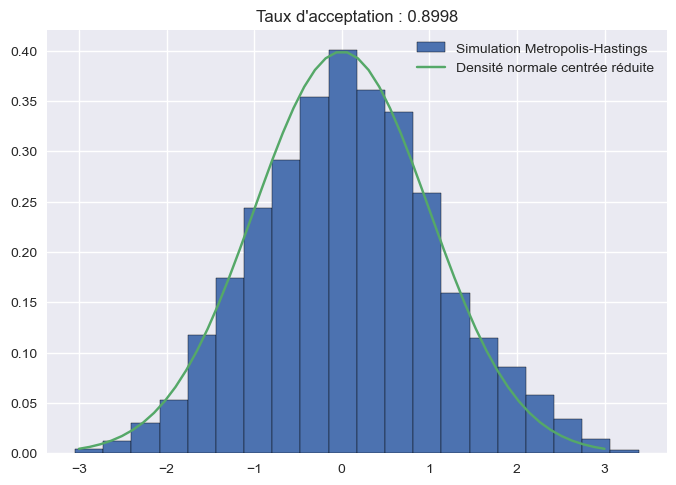

In [41]:
# Answer
norm = stats.norm()

x = np.linspace(-3, 3)

# Fin compléter
plt.title(f"Taux d'acceptation : {rate}");
plt.hist(S, density=True, bins=20,edgecolor='black', label="Simulation Metropolis-Hastings")
plt.plot(x, norm.pdf(x), label="Densité normale centrée réduite")
plt.legend()
plt.show()

#aqui tenim que en aquest cas no esta el ratio entre 20% i 80% però perquè la llei cible és massa "senzilla"


**Réponse :**
…

>**Question 5.**
Plutôt qu'une loi de proposition uniforme sur $[-1/2,1/2]$, considérer une loi uniforme sur $[-10,10]$. Qu'observez-vous ? Et avec une loi uniforme sur $[-0.1,0.1]$ ?

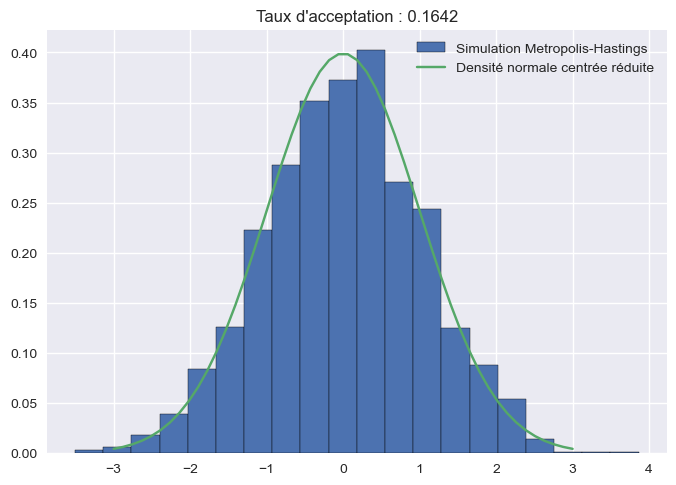

In [26]:
kernel2 = stats.uniform(loc=-10, scale=20)
S2, rate2  = sample_metropolis(kernel2, n, x0)

# Answer
norm = stats.norm()

x = np.linspace(-3, 3)

# Fin compléter
plt.title(f"Taux d'acceptation : {rate2}");
plt.hist(S2, density=True, bins=20,edgecolor='black', label="Simulation Metropolis-Hastings")
plt.plot(x, norm.pdf(x), label="Densité normale centrée réduite")
plt.legend()
plt.show()

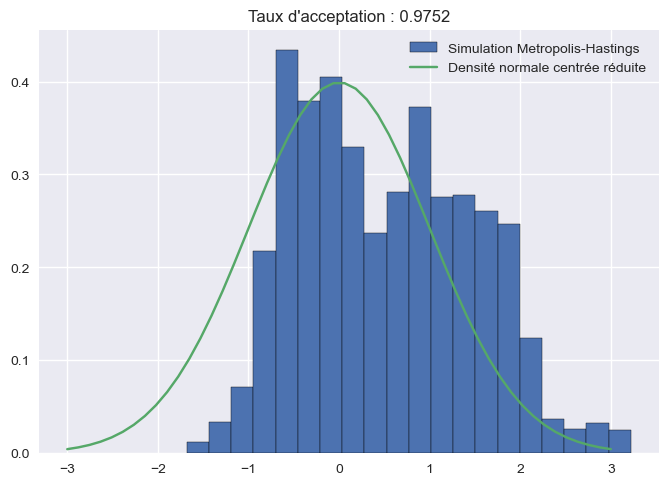

In [ ]:
kernel3 = stats.uniform(loc=-0.1, scale=0.2)
S3, rate3  = sample_metropolis(kernel3, n, x0)

# Answer
norm = stats.norm()

x = np.linspace(-3, 3)

# Fin compléter
plt.title(f"Taux d'acceptation : {rate3}");
plt.hist(S3, density=True, bins=20,edgecolor='black', label="Simulation Metropolis-Hastings")
plt.plot(x, norm.pdf(x), label="Densité normale centrée réduite")
plt.legend()
plt.show()

#el ratio es un indicador de com de bo es el nucli de transició. 
# Pel segon exemple tenim que molts tiratges son fora de la moda de la densitat que volem simular
#Si esta el nucli massa concentrat, l'acceptarem molt perque el rayon de metropolis serà ben proper a 1. Si estem per sobre 
#del 80%, hem de sospitar que potser no va del tot bé. Lo bo és entre 20% i 80%

**Réponse :**
…

# Exercice 2 : Metropolis-Adjusted Langevin Algorithm (MALA) <a id="part2"></a>
>Reprenons le même cadre que celui de l'exercice précédent, i.e. o souhaite veut simuler (approximativement) une loi normale centrée réduite grâce à l'algorithme de Metropolis, en considérant le noyau de proposition $q$ de sorte que, pour tout $x \in \mathbb R$, $q(x, \cdot)$ corresponde à la densité de la variable aléatoire $Y=x+U$ avec $U \sim \mathcal U_{[-1/2,1/2]}$. 
>
>**Question 1.**
>Construire une chaîne de longueur $n=10^4$ avec la condition initiale $X_0=10$ à l'aide de l'algorithme de Metropolis, et représenter un histogramme des $X_i$ auquel on superposera la densité de la loi normale centrée réduite.
Indiquer le taux d'acceptation dans le titre de la figure.
Que pouvez-vous en dire ?

10000


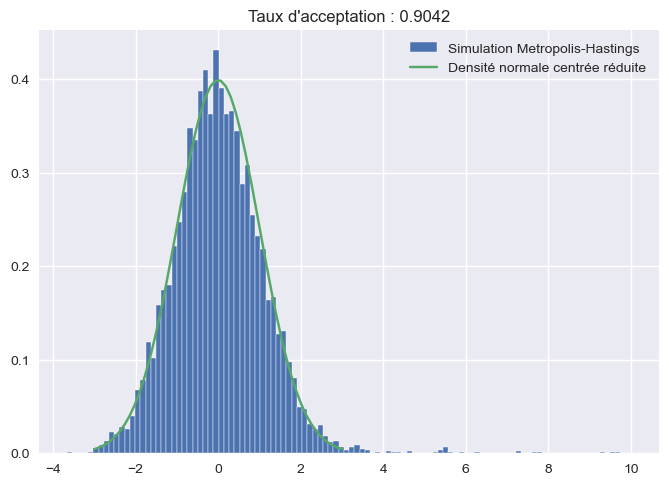

In [46]:
n = 10**4
print(n)
x0 = 10
S0, rate0 = sample_metropolis(kernel, n, x0)

plt.title(f"Taux d'acceptation : {rate0}");
plt.hist(S0, **nice_hist, label="Simulation Metropolis-Hastings") #mirar què es **nice_hist
plt.plot(x, norm.pdf(x), label="Densité normale centrée réduite")
plt.legend()
plt.show()

**Réponse :**
…

>**Question 2.**
Appelons $\varphi$ la densité de la gaussienne centrée réduite.
On considère maintenant un noyau de proposition qui n'est pas symétrique : sachant $X_n=x$, la proposition est 
$$Y_{n+1}=x+\frac{\sigma^2}{2}\times\frac{\varphi'(x)}{\varphi(x)}+\sigma W_{n+1},$$
où $W_{n+1}$ suit une loi normale centrée réduite et $\sigma>0$ est un paramètre de réglage.
>
>Quelles transitions sont favorisées par ce noyau instrumental ?

In [ ]:
#on note que phi'(x)/phi(x) = -x, donc Yn+1 = x(1-sigma^2/2) + sigmaN(0,1) donc on aura une normale centrée à gauche de Xn
#ainsi on aura une tendence en aller à gauche

**Réponse :**
…

>**Question 3.**
Expliciter le rapport de Metropolis $\rho(x,y)$.

In [ ]:
#en developant les densités normales on arrive avec à que le rayon est e^((sigma^2)/8 * (x^2-y^2)

**Réponse :**
…

>**Question 4.**
Écrire une fonction `sample_mala(size=1, init=0., sigma=1)` qui construit une chaîne de Markov de taille $n=$ `size+1` partant du point `init` selon l'algorithme décrit ci-avant.
La fonction devra retourner la réalisation de la chaîne et le taux d'acceptation.
>
>Appliquer cet algorithme avec $\sigma=1$ pour construire une chaîne de longueur $n=10^4$ et partant du point $X_0=10$, puis représenter l'histogramme des réalisations obtenues.

**Réponse :**
…

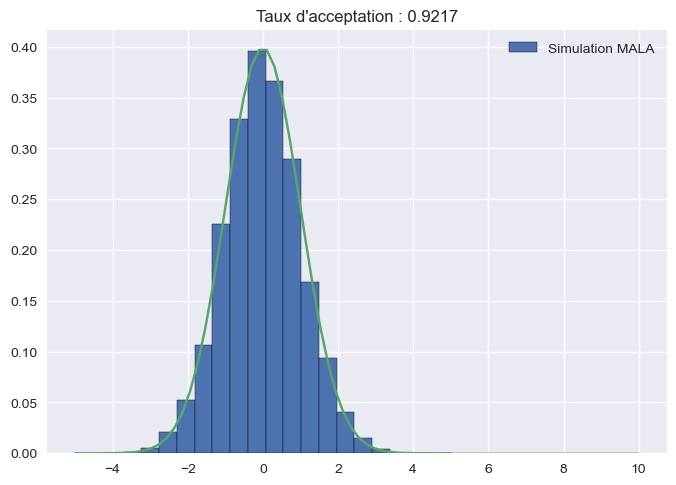

In [ ]:
# Answer
n = 10**4

# Loi cible N(0, 1), sa densité non-normalisée et sa dérivée
norm = stats.norm()
f = lambda x: np.exp(-x**2/2)
f_der = lambda x: -x*np.exp(-x**2/2)
# Noyau non-normalisé q(x, y, sigma)
def q(x,y,sigma):
    return np.exp(-(y - (x + (sigma**2)/2 * f_der(x)/f(x)))**2/(2*sigma**2))


def sample_mala(size=1, init=0., sigma=1.):
    unif = stats.uniform()
    threshold = unif.rvs(size=size)  # Array of the n thresholds U_i
    move = stats.norm().rvs(size=size)  # Array of the n moves from the current position
    
    sample = [init]
    n_acc = 0
    for i in range(size):
        cand = init + (sigma**2)/2 * f_der(init)/f(init) + sigma*move[i]
        r = f(cand) * q(cand, init, sigma) / (f(init) * q(init, cand, sigma))
        if(threshold[i] <= r):
            sample.append(cand)
            init = cand
            n_acc+=1
        else:
            sample.append(init)

        # Fin compléter
    return np.asarray(sample), n_acc/size

# Création de la chaîne avec LAMA
Sm, rate_mala = sample_mala(n, 10, 1)

# Figure
plt.title(f"Taux d'acceptation : {rate_mala}")
plt.hist(Sm, density=True, bins=30, edgecolor='black', label="Simulation MALA")
plt.plot(np.linspace(-5,5), norm.pdf(np.linspace(-5,5)))
plt.legend()
plt.show()

#notem que es mou de seguida cap a la zona de la moda de la densitat cible. Un cop a dins la moda, veiem que q esdevé
#simètrica i que per tant obtenim el algoritme de metropolis

**Réponse :**
…

# Exercice 3 : Metropolis vs rejet <a id="part3"></a>
>On considère la loi $G$ de densité sur $\mathbb{R}^2$ proportionnelle à 
$$ f(u,v) =   (\cos u ) ^2     ( \sin v) ^2  \operatorname{e}^{-0.05   (u^2 + v^2)}.$$
>
>**Question 1.**
Définir une fonction `F(U, V)` retournant $f(U, V)$ et utiliser le code ci-dessous pour afficher une représentation 3D de $f$ sur $[-5,5]\times[-5,5]$.

In [41]:
def plot_surf(U, V, Z, figsize=(15, 12)):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='3d'))
    # ax.view_init(30, 120)
    plt.rcParams['axes.grid'] = False
    surf = ax.plot_surface(U, V, Z, rstride=1, cstride=1, cmap="coolwarm", linewidth=0)
    ax.contourf(U, V, Z, zdir='z', offset=Z.max()+1, cmap="coolwarm", alpha=0.5)
    ax.set_zlim(top=Z.max()+1)
    fig.colorbar(surf)
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('z')
    plt.rcParams['axes.grid'] = True
    return fig, ax

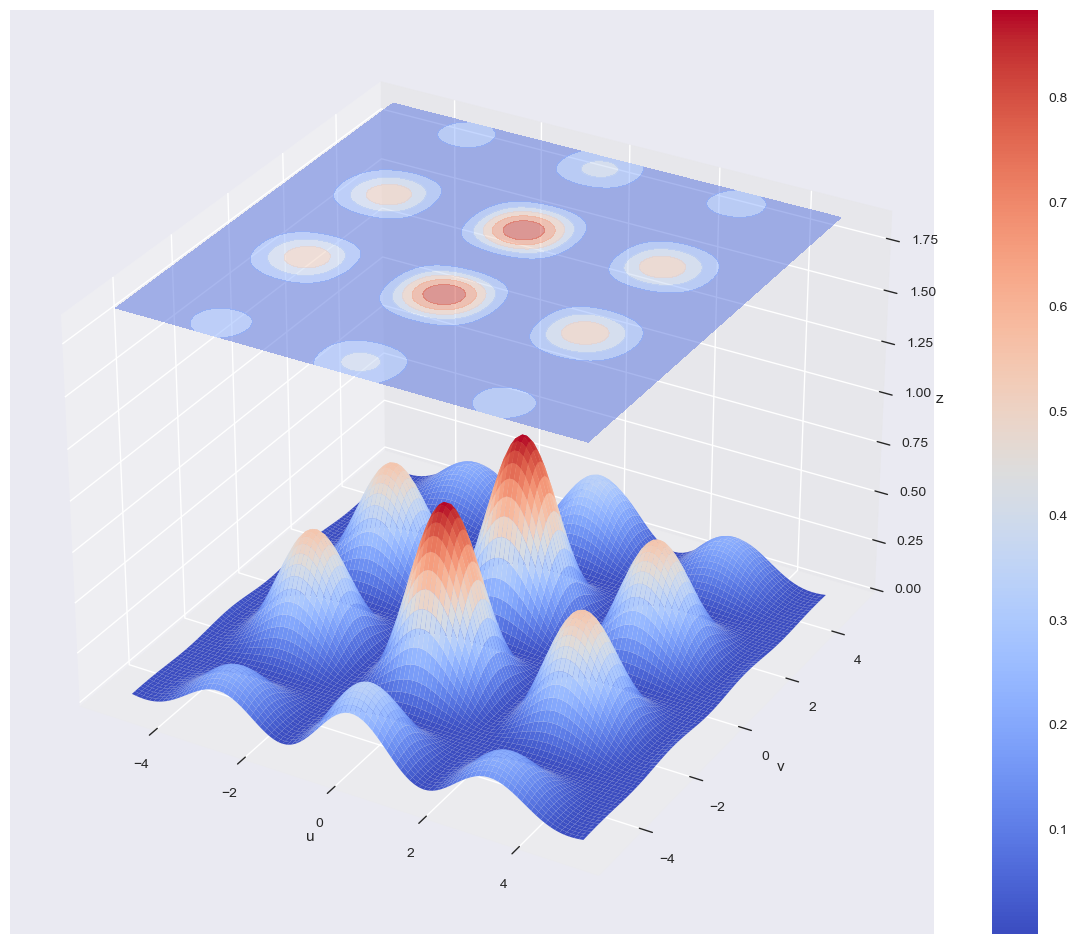

In [42]:
# Answer
def F(u, v):
    return (np.cos(u))**2 * (np.sin(v))**2 * np.exp(-0.05*(u**2+v**2))

u = np.linspace(-5, 5, num=100)
v = np.linspace(-5, 5, num=100)
U, V = np.meshgrid(u, v)  # All possible pairs from u and v

Z = F(U,V)

plot_surf(U, V, Z);

**Réponse :**
…

>**Question 2.**
On veut simuler (approximativement) selon la loi $G$ en utilisant l'algorithme de Metropolis.
>Partant de $x=(u,v)$, on considère le noyau de proposition $q$ défini de sorte que $q(x,\cdot)$ corresponde à la densité de $Y=x+\sigma W$, où $\sigma>0$ est un paramètre de réglage et $W\sim{\cal N} \left(\binom 00,I_2 \right)$, loi gaussienne centrée réduite dans $\mathbb{R}^2$.
>Expliquer pourquoi nous sommes dans le cadre de l'algorithme de Metropolis symétrique.

**Réponse :**
…

In [43]:
#on note que q(y,x) = 1/sqrt(2pisigma**2) * exp(-(||y-x||**2)/2sigma**2), et donc on aura au dénominateur que:
#q(x,y) = 1/sqrt(2pisigma**2) * exp(-(||y-x||**2)/2sigma**2), comme ||y-x||**2 = ||x-y||**2 par symetrie de la norme,
#on conclut que q(y,x)/q(x,y) = 1 et donc que on est dans le cadre de l'algo de Metropolis symétrique

>**Question 3.**
Implémenter l'algorithme de Metropolis. On utilisera le noyau de proposition $q$ ci-dessus avec $\sigma=1$. On pourra par exemple prendre comme initialisation $X_0=(0,0)$ et considérer une chaîne $(X_k)_{0\leq k\leq n}$ de longueur $n=10^4$. En fin de simulation, afficher le taux global d'acceptation sur l'ensemble des mutations proposées.

In [44]:
# Answer
def f(x):
    u, v = x
    return F(u, v)

def sample_metropolis_2d(kernel, size=1, init=(0., 0.)):
    unif = stats.uniform()
    threshold = unif.rvs(size=size)  # Array of the n thresholds U_i
    move = kernel.rvs(size=size)  # Array of the n moves from the current position
    
    sample = [init]
    n_acc = 0
    for i in range(size):
        cand = init + move[i]
        if(f(init)==0):
            init = cand
            sample.append(cand)
            n_acc+=1
        elif(threshold[i] <= min(1,f(cand)/f(init))):
            init = cand
            sample.append(cand)
            n_acc+=1
        else:
            sample.append(init)
        
    return np.asarray(sample), n_acc/size

n = 10**4
sigma = 1

# Création de la chaîne avec Metropolis et affichage du taux d'acceptation
# Compléter
x0 = np.array([0,0])
def K(sigma):
    return stats.multivariate_normal(mean=[0,0], cov=[[sigma**2, 0], [0, sigma**2]])
S4, rate = sample_metropolis_2d(K(sigma), size=n, init=x0)

print(f"Taux d'acceptation : {rate}")

Taux d'acceptation : 0.4347


**Réponse :**
…

>**Question 4.**
Sur le graphe de $f$ par lignes de niveau (`plt.contourf(U, V, Z, cmap=cm.coolwarm, alpha=0.5)`), superposer les points de la chaîne. Faire la même chose avec $\sigma$ grand, par exemple $\sigma=10$, et commenter. Idem avec $\sigma$ petit, par exemple $\sigma=0.1$. Afficher les taux d'acceptation dans les deux cas.

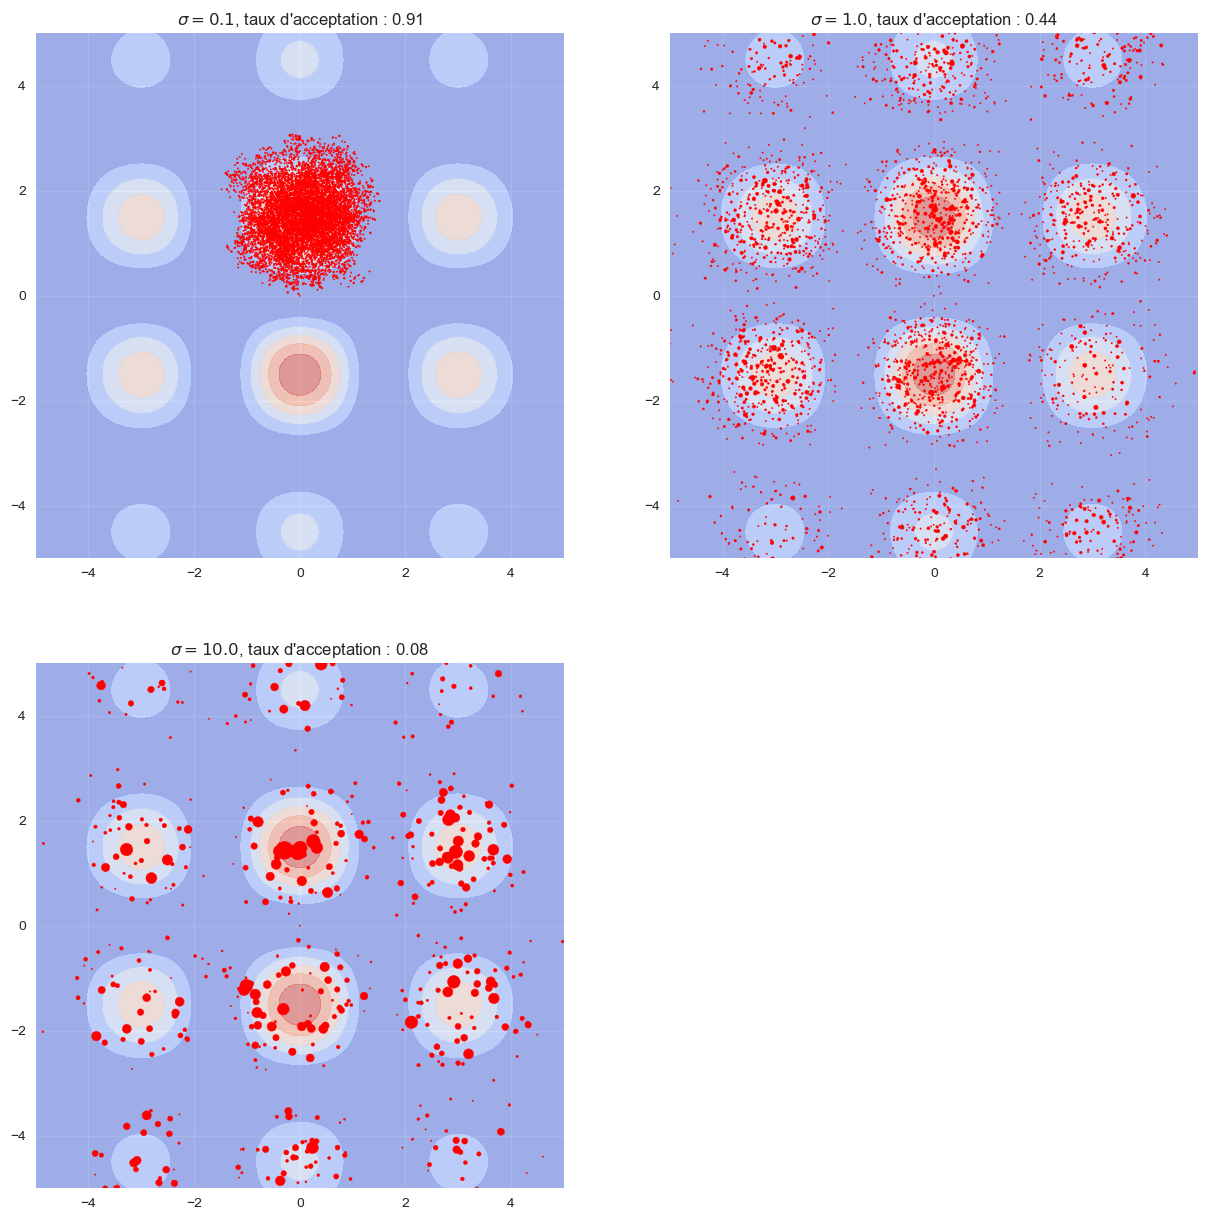

In [45]:
# Answer
plt.figure(figsize=(15, 15))
for i, sigma in enumerate([0.1, 1, 10]):
    # Création de la chaîne avec Metropolis
    C, r = sample_metropolis_2d(K(sigma), n, )
    plt.subplot(2, 2, i+1)
    plt.contourf(U, V, Z, cmap="coolwarm", alpha=0.5)
    uniq, c = np.unique(C, axis = 0, return_counts=True)
    plt.scatter(uniq[:,0], uniq[:,1], color='red', s=c)
    plt.xlim([U.min(), U.max()])
    plt.ylim([V.min(), V.max()])
    plt.title(f"$\\sigma={sigma:.1f}$, taux d'acceptation : {r:.2f}")

**Réponse :**
…

>**Question 5.**
Proposer une méthode de rejet pour simuler suivant la loi $G$ à partir d'une loi instrumentale gaussienne. Comme en question précédente, superposer un échantillon de grande taille simulé par cette méthode aux lignes de niveau de la fonction $f$ pour vérifier visuellement le bon fonctionnement de l'algorithme.

**Réponse :**
…

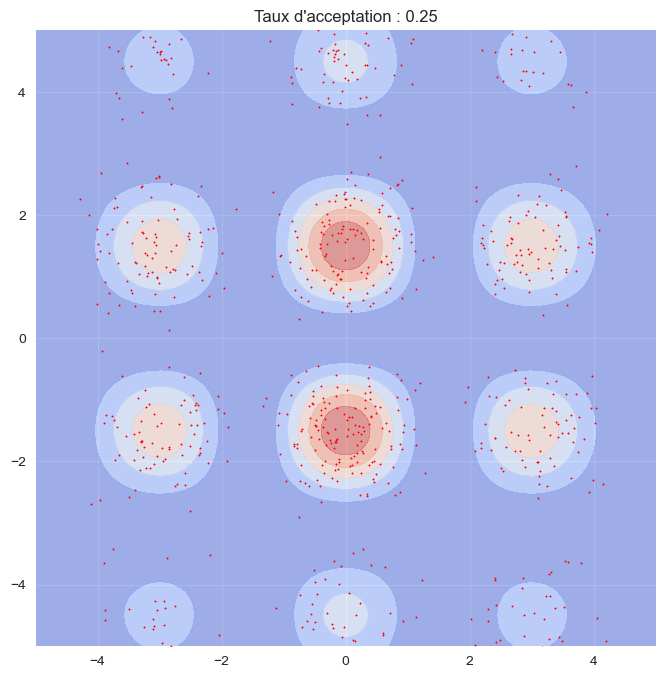

In [ ]:
#on arrive a que si on prend une normale multivariée centrée avec matrice de covariande sigma**2 * Id_2, en prenant
#c = sqrt(2pi*sigma**2) on a que r(u,v) = 1 si sigma**2=10

# Answer
aux = stats.multivariate_normal(cov=10*np.eye(2))
unif = stats.uniform()

n = 10**3

sample = []
n_tot = 0
for i in range(n):
    candidate = aux.rvs()
    n_tot += 1
    # Boucle créant de nouveaux candidats jusqu'à l'acceptation de l'un d'eux
    u = unif.rvs()
    
    while(u > f(candidate)/(2*np.pi*10*aux.pdf(candidate))):
        u = unif.rvs()
        candidate = aux.rvs()
        n_tot+=1

    sample.append(candidate)
sample = np.asarray(sample)
rate = n / n_tot

plt.figure(figsize=(8, 8))
plt.contourf(U, V, Z, cmap="coolwarm", alpha=0.5)
plt.scatter(*sample.T, c='r', s=1)
plt.xlim([U.min(), U.max()])
plt.ylim([V.min(), V.max()])
plt.title(f"Taux d'acceptation : {rate:.2f}");

>**Question 6.**
Des deux méthodes, laquelle vous semble préférable ?

**Réponse :**
…

In [ ]:
#Dans ce cadre on privilégierons la méthode de Metropolis car on obtien avec un meilleur taux d'acceptation un résultat similair
#à lequel avec la méthode de rejet. Donc, si le taux d'acceptation est plus grand, alors on aura que le temps d'execution
#de l'algorithme sera réduit

# Exercice 4 : Algorithme de Metropolis pour l'échantillonnage d'une loi a posteriori <a id="part4"></a>
>On considère le modèle bayésien :
\begin{cases}
    \boldsymbol \theta \sim {\cal U}_{[0,1]} \\
    (X_1, \dots, X_n) | \boldsymbol \theta \sim \left( \boldsymbol \theta \mathcal N(1, 1) + (1-\boldsymbol \theta) \mathcal N(-1, 1) \right)^{\otimes n}.
    %\mathbf X | \boldsymbol \theta \sim \left( \boldsymbol \theta N(1, 1) + (1-\boldsymbol \theta) N(-1, 1) \right)^{\otimes n}.
\end{cases}
Notons $\varphi$ la densité de $\mathcal N(0, 1)$. Ainsi, sachant $\boldsymbol \theta = \theta$,  $X_1$ a pour densité $\theta \varphi(x-1) + (1-\theta) \varphi(x+1)$.
On remarque aussi que, sachant $\boldsymbol \theta = \theta$, $X_1\overset{\mathcal{L}}{=} B Y_1 + (1-B) Y_{-1}$, où $Y_1, Y_{-1}$ et $B$ sont trois variables aléatoires indépendantes de lois respectives :
$$
    \begin{cases}
        Y_1 \sim \mathcal N(1, 1) \\
        Y_{-1} \sim \mathcal N(-1, 1) \\
        B \sim \text{Ber}(\theta).
    \end{cases}
$$
>
>**Question 1.**
Soit $\theta_0$ une réalisation de $\boldsymbol \theta$.
Pour $n=100$, générer une réalisation de $X_1,\dots,X_n$ selon le mélange ci-dessus pondéré par $\theta_0$.

theta0 = 0.08181263103921366


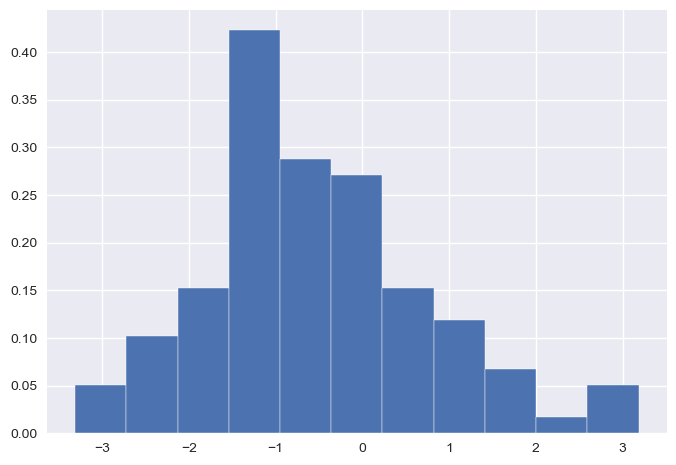

In [16]:
# Answer
# A priori
prior = stats.uniform()
theta0 = prior.rvs()

# Lois utiles
ber = stats.bernoulli(theta0)
normp = stats.norm(loc=1)
normm = stats.norm(loc=-1)

n = 100
# Simulation de X
B = ber.rvs(size=100)
X = B*normp.rvs(size=100) + (1-B)*normm.rvs(size=100)

print(f'theta0 = {theta0}')
plt.hist(X, **nice_hist);

>**Question 2.**
Expliciter la loi a posteriori $\Pi[\cdot | \mathbf X]$ et un estimateur de Bayes $\hat \theta_n$ pour la perte quadratique.

**Réponse :**
…

In [17]:
#on ne peut pas expliciter qu'une formule intégrale de la loi a posteriori car on ne sait pas intégrer la constante de
#normalisation pour obtenir f(X). De même, pour obtenir la moyenne a posteriori, il faut calculer la intégrale par rapport
#à theta entre 0 et 1 de theta * (loi a posteriori), en retrouvant à nouveau une expression qu'on ne sait pas intégrer analytiquement

>**Question 3.**
En déduire un estimateur Monte-Carlo $\hat\theta_n^N$ de la réalisation de $\hat\theta_n$. L'implémenter pour $N=500$ par exemple. 

In [18]:
#on a que la moyenne a posteriori équivaut a la intégrale de 0 a 1 par rapport a theta de (theta*pi(theta|X))
#En utilisant la formule de Bayes on obtien que ça équivaut à l'esperance sur theta suivant la loi a priori de theta*p_theta(x)
#divisée par l'esperánce de p_theta(x)

#donc, en utilisant MC naif, on a que on peut calculer ces ésperances comme 1/N * sum_1^N(theta_i*p_theta_i(x))
#et 1/N * sum_1^N(p_theta_i(x))

**Réponse :**
…

0.08181263103921366


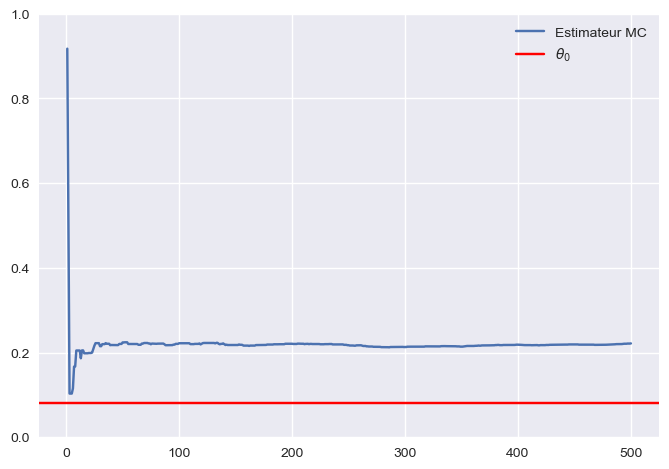

In [29]:
# Answer
N = 500

# Calcul de l'estimateur Monte-Carlo
thetas = stats.uniform.rvs(size=N)
p = []
for theta in thetas:
    p.append((theta*np.exp(-(X-1)**2 / 2) + (1-theta)*np.exp(-(X+1)**2 / 2)).prod())

estMC = (thetas*np.array(p)).cumsum()/np.array(p).cumsum()
print(theta0)
# Figure
plt.plot(np.arange(1, N+1), estMC, label = "Estimateur MC")
plt.axhline(theta0, color="red", label="$\\theta_0$")
plt.ylim(0, 1)
plt.legend();

>**Question 4.**
>On souhaite générer un échantillon suivant la loi a posteriori $\Pi[\cdot | \mathbf X]$. On adopte pour cela la méthode de Metropolis avec comme noyau de proposition $q$ défini par $q(\theta,\theta')=\mathbf 1_{[0,1]}(\theta')$.
Que vaut le rapport de Metropolis-Hastings $\rho(\theta,\theta')$ ?
>Avec la condition initiale $\boldsymbol \theta_1=1/2$, implémenter l'algorithme pour une chaîne de longueur $m=10^4$ et représenter un histogramme des $\boldsymbol \theta_j$. Donner le taux global d'acceptation sur l'ensemble des mutations proposées.

**Réponse :**
…

In [20]:
#on note que avec le noyau de proposition choisi, on a que le rapport de Metropolis-Hastings est p_theta'(x)/p_theta(x),
#après dévélopper avec la formule de Bayes la loi a posteriori de theta sachant X

1761
Taux d'acceptation : 0.18


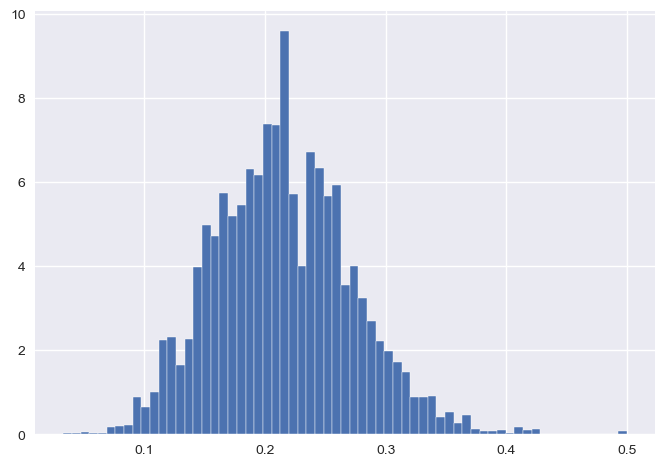

In [ ]:
# Answer
m = 10000
init = 0.5
from numpy.random import default_rng
rng = default_rng()

threshold = prior.rvs(size=m-1, random_state=rng)
move = prior.rvs(size=m-1,random_state=rng)


def p(cand, init):
    return (cand*normp.pdf(X) + (1-cand)*normm.pdf(X)).prod() / (init*normp.pdf(X) + (1-init)*normm.pdf(X)).prod()
    

sample = [init]
for i in range(m-1):
    cand = move[i]

    if(threshold[i] <= min(1,p(cand,init))):
        sample.append(cand)
        init = cand
    else:
        sample.append(init)

plt.hist(sample, **nice_hist)
print(f"Taux d'acceptation : {len(np.unique(sample)) / m:.2f}")

**Réponse :**
…

>**Question 5.**
Mêmes questions en considérant le noyau de transition correspondant à $\boldsymbol \theta' = \boldsymbol \theta+U/\sqrt{n}$ (modulo 1), avec $U \sim \mathcal U_{[-1,1]}$.

6658
Taux d'acceptation : 0.67


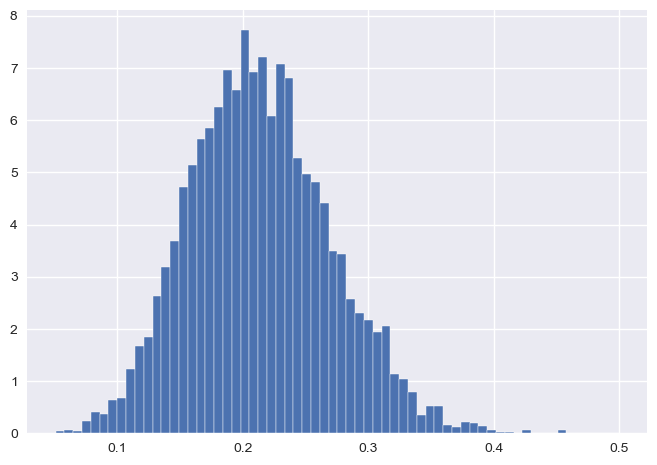

In [28]:
# Answer
m = 10000
init = 0.5
from numpy.random import default_rng
rng = default_rng()

threshold = prior.rvs(size=m-1, random_state=rng)
move = stats.uniform.rvs(loc=-1, scale=2, size=m-1,random_state=rng)

def p(cand, init):
    P = (cand*normp.pdf(X) + (1-cand)*normm.pdf(X)).prod() / (init*normp.pdf(X) + (1-init)*normm.pdf(X)).prod()
    return P * (0<=cand<=1)
    
 

sample = [init]
for i in range(m-1):
    cand = (init + move[i]/np.sqrt(len(X)))%1
    if(abs(init-cand) > 1):
        sample.append(init)

    elif(threshold[i] <= p(cand,init)):
        sample.append(cand)
        init = cand
    else:
        sample.append(init)

plt.hist(sample, **nice_hist)
print(len(np.unique(sample)))
print(f"Taux d'acceptation : {len(np.unique(sample)) / m:.2f}")

**Réponse :**
…